In [1]:
import pymatgen as mg
from pymatgen.io.vasp.outputs import BSVasprun, Vasprun
from pymatgen import Spin
from pymatgen.electronic_structure.plotter import BSPlotter, BSDOSPlotter, DosPlotter

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is 7676-6C56

 Directory of C:\Users\Owner\Documents\Python Scripts\Otest\O103

06/13/2018  03:00 PM    <DIR>          .
06/13/2018  03:00 PM    <DIR>          ..
06/13/2018  03:00 PM    <DIR>          .ipynb_checkpoints
06/13/2018  02:19 PM           378,017 Analyze vasprun.ipynb
06/13/2018  03:00 PM           574,487 Band Structure of.ipynb
06/12/2018  09:50 PM               274 KPOINTS
06/13/2018  03:32 AM        12,590,826 vasprun.xml
               4 File(s)     13,543,604 bytes
               3 Dir(s)  172,816,756,736 bytes free


In [3]:
run = BSVasprun("vasprun.xml", parse_projected_eigen=True)

In [4]:
bs = run.get_band_structure("KPOINTS")

In [5]:
print("number of bands", bs.nb_bands)

number of bands 60


In [6]:
print("number of kpoints", len(bs.kpoints))

number of kpoints 40


In [7]:
bs.is_metal()

False

In [8]:
bs.is_spin_polarized

False

In [9]:
bs.bands

{<Spin.up: 1>: array([[-16.6878, -16.6776, -16.6498, ..., -16.7747, -16.8301, -16.8498],
        [-16.1417, -16.1564, -16.1969, ..., -16.1409, -16.0861, -16.0662],
        [ -4.0738,  -4.0613,  -4.031 , ...,  -4.1614,  -4.1934,  -4.2048],
        ..., 
        [ 26.4073,  26.5341,  27.0166, ...,  31.168 ,  31.6778,  31.8427],
        [ 30.6222,  30.9498,  29.416 , ...,  31.4116,  31.7606,  31.8427],
        [ 33.6563,  31.7489,  29.416 , ...,  31.449 ,  32.0369,  32.0769]])}

In [10]:
bs.bands[Spin.up].shape

(60, 40)

In [11]:
bs.bands[Spin.up][9,:]

array([-0.7099, -0.686 , -0.6203, -0.5375, -0.4895, -0.5039, -0.5532,
       -0.6139, -0.6848, -0.7354, -0.7354, -0.714 , -0.6754, -0.6265,
       -0.5671, -0.501 , -0.4343, -0.3753, -0.3412, -0.3643, -0.3643,
       -0.3675, -0.3792, -0.4007, -0.4244, -0.4481, -0.4705, -0.4905,
       -0.5074, -0.5208, -0.5208, -0.5375, -0.5239, -0.4899, -0.4339,
       -0.4877, -0.5675, -0.6412, -0.7009, -0.7354])

In [12]:
n = 0
for kpoints, e in zip(bs.kpoints, bs.bands[Spin.up][9,:]):
    n += 1
    if n == 11:
        print("...")
    if 10 < n < 190:
        continue
        
    print("kx = %5.3f  ky = %5.3f  kz = %5.3f  eps(k) = %8.4f" % (tuple(kpoints.frac_coords)+ (e,)))

kx = 0.500  ky = 0.500  kz = 0.500  eps(k) =  -0.7099
kx = 0.444  ky = 0.444  kz = 0.444  eps(k) =  -0.6860
kx = 0.389  ky = 0.389  kz = 0.389  eps(k) =  -0.6203
kx = 0.333  ky = 0.333  kz = 0.333  eps(k) =  -0.5375
kx = 0.278  ky = 0.278  kz = 0.278  eps(k) =  -0.4895
kx = 0.222  ky = 0.222  kz = 0.222  eps(k) =  -0.5039
kx = 0.167  ky = 0.167  kz = 0.167  eps(k) =  -0.5532
kx = 0.111  ky = 0.111  kz = 0.111  eps(k) =  -0.6139
kx = 0.056  ky = 0.056  kz = 0.056  eps(k) =  -0.6848
kx = 0.000  ky = 0.000  kz = 0.000  eps(k) =  -0.7354
...


In [13]:
bsplot = BSPlotter(bs)

2.96531738


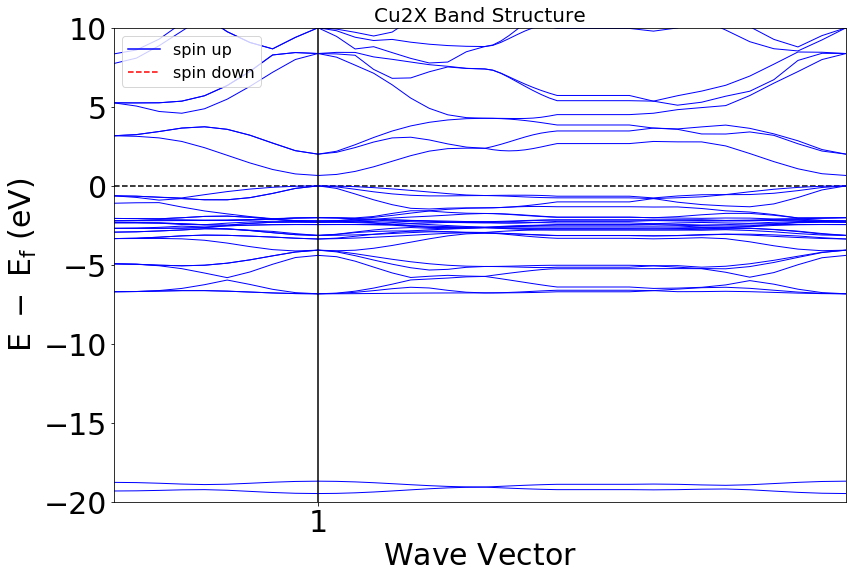

In [14]:
# get the plot
bsplot.get_plot(ylim=(-20, 10), zero_to_efermi=True)
print(bs.efermi)

# add some features
ax = plt.gca()
ax.set_title("Cu2X Band Structure", fontsize=20)
xlim = ax.get_xlim()
ax.hlines(0, xlim[0], xlim[1], linestyles="dashed", color="black")

# add legend
ax.plot((), (), "b-", label="spin up")
ax.plot((), (), "r--", label="spin down")
ax.legend(fontsize=16, loc="upper left")

In [15]:
data = bsplot.bs_plot_data()

In [16]:
data.keys()

dict_keys(['ticks', 'distances', 'energy', 'vbm', 'cbm', 'lattice', 'zero_energy', 'is_metal', 'band_gap'])

In [17]:
ibands = 9 # band number from 0 --> number of bands
spin = str(Spin.up)

for xpath, epath in zip(data["distances"], data["energy"]):
    print(20 * "-")
    for x, bands in zip(xpath, epath[spin][ibands]):
        print("%8.4f %8.4f" % (x, bands))

--------------------
  0.0000  -3.3378
  0.1414  -3.3139
  0.2827  -3.2482
  0.4241  -3.1654
  0.5654  -3.1174
  0.7068  -3.1318
  0.8481  -3.1811
  0.9895  -3.2418
  1.1308  -3.3127
  1.2722  -3.3633
--------------------
  1.2722  -3.3633
  1.3876  -3.3419
  1.5030  -3.3033
  1.6184  -3.2544
  1.7338  -3.1950
  1.8492  -3.1289
  1.9646  -3.0622
  2.0801  -3.0032
  2.1955  -2.9691
  2.3109  -2.9922
  2.3109  -2.9922
  2.3609  -2.9954
  2.4108  -3.0071
  2.4608  -3.0286
  2.5108  -3.0523
  2.5608  -3.0760
  2.6107  -3.0984
  2.6607  -3.1184
  2.7107  -3.1353
  2.7607  -3.1487
  3.2104  -3.1487
  3.3604  -3.1654
  3.5103  -3.1518
  3.6602  -3.1178
  3.8102  -3.0618
  3.9601  -3.1156
  4.1100  -3.1954
  4.2599  -3.2691
  4.4099  -3.3288
  4.5598  -3.3633


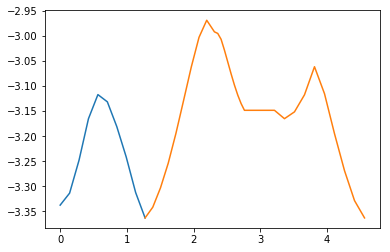

In [18]:
ibands = 9 # band number from 0 --> number of bands
spin = str(Spin.up)

for xpath, epath in zip(data["distances"], data["energy"]):
    plt.plot(xpath, epath[spin][ibands])

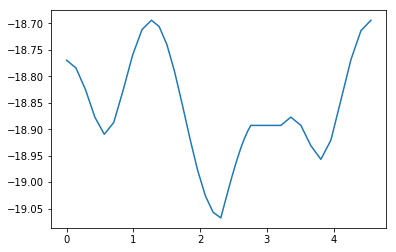

In [19]:
ibands = 1  # band number from 0 --> number of bands
spin = str(Spin.up)

x = list()
y = list()
for xpath, epath in zip(data["distances"], data["energy"]):
    x += xpath
    y += epath[spin][ibands]

plt.plot(x, y)

In [20]:
dosrun = Vasprun("vasprun.xml", parse_dos=True)
dos = dosrun.complete_dos
print(dosrun.efermi)
print(dos.efermi)

2.96531738
2.96531738


C:\Users\Owner\Anaconda3\lib\site-packages\pymatgen\io\vasp\outputs.py:877: UserWarning: No POTCAR file with matching TITEL fields was found in C:\Users\Owner\Documents\Python Scripts\Otest\O103
  " was found in {}".format(os.path.abspath(p)))


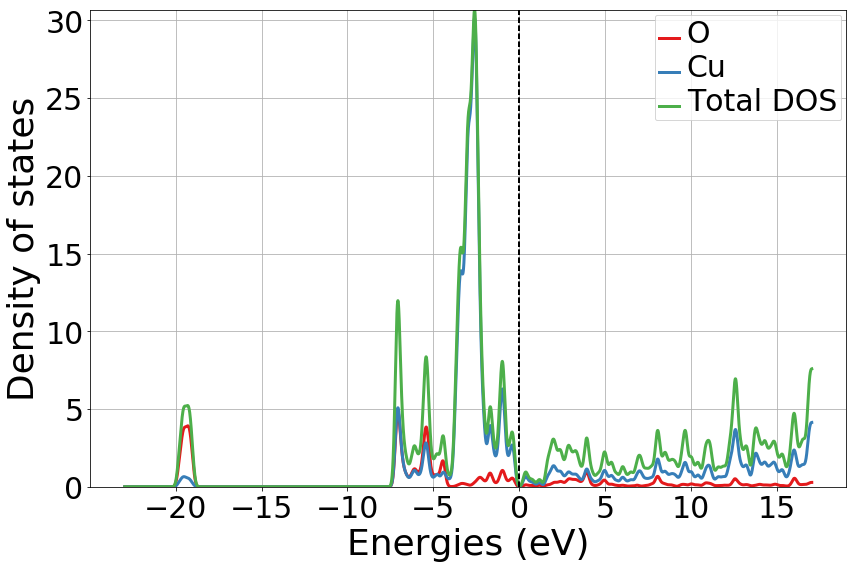

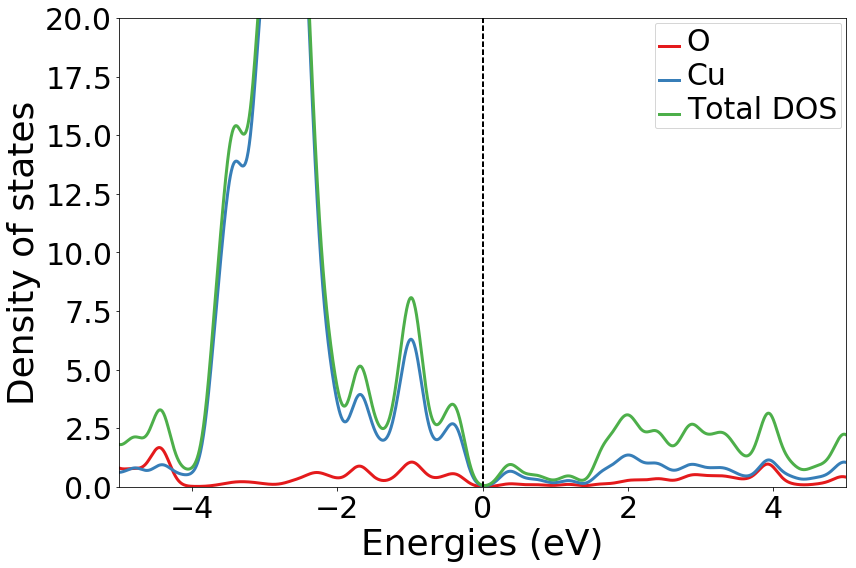

In [21]:
dosplot = DosPlotter(sigma=0.1)
dosplot.add_dos("Total DOS", dos)
dosplot.add_dos_dict(dos.get_element_dos())
plot = dosplot.get_plot()
plt.grid()
dosplot.show(xlim=[-5, 5], ylim=[0, 20])

In [22]:
bs = run.get_band_structure("KPOINTS", efermi=dos.efermi)

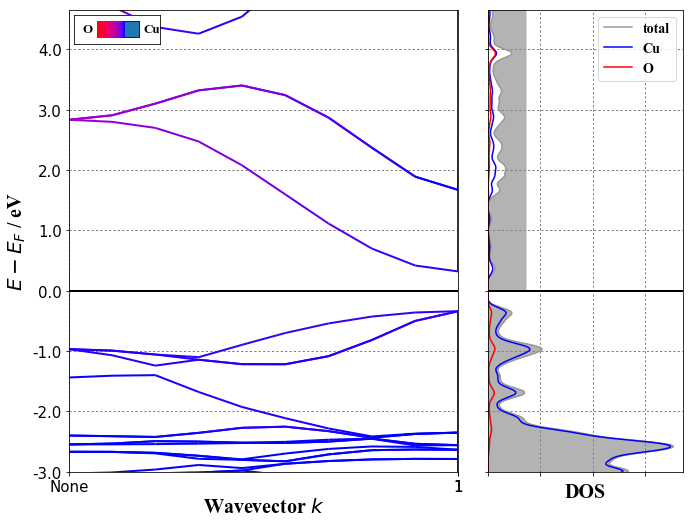

In [23]:
bsdosplot = BSDOSPlotter(
    bs_projection="elements",
    dos_projection="elements",
    vb_energy_range=3,
    egrid_interval=1
)
plt = bsdosplot.get_plot(bs, dos=dos)

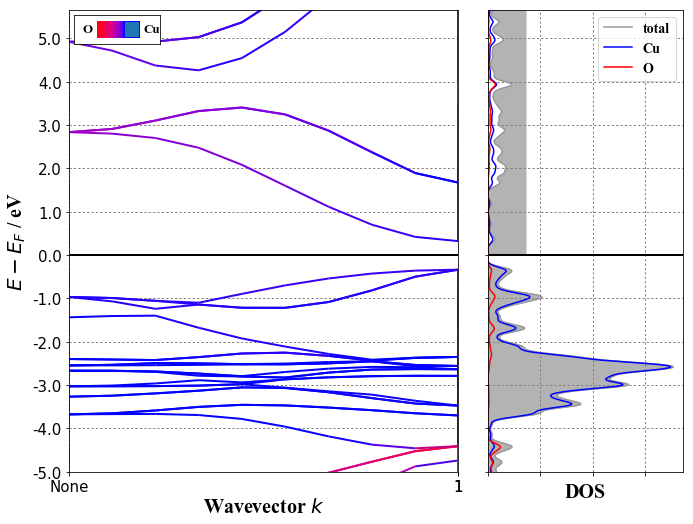

In [24]:
bsdosplot = BSDOSPlotter(
    bs_projection="elements",
    dos_projection="elements",
    vb_energy_range=5,
    cb_energy_range=5,
    egrid_interval=1
)
plt = bsdosplot.get_plot(bs, dos=dos)